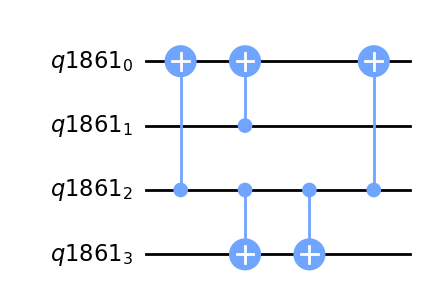

In [25]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

# load a dummy circuit
# generate network of random cnots
n, M = 2, 5
N = n**2
register = QuantumRegister(N)
qc = QuantumCircuit(register)

for _ in range(M):
    qc.cx(*np.random.choice(N, 2, replace=False))
qc.name = "random cx circuit"
qc.decompose().draw("mpl")

In [27]:
from transpile_benchy.main import Benchmark
from qiskit.transpiler import CouplingMap
from virtual_swap.pass_managers import SabreCNS, Baseline, SabreQiskit

coupling = CouplingMap.from_line(4)
# t0 = Baseline(coupling)
t0 = SabreQiskit(coupling)
t1 = SabreCNS(coupling)

# b = Benchmark(t0, size="small", prepath="../../../transpile_benchy")
b = Benchmark(t0, t1, circuit_list=[qc])
b.run()

# plot and save as svg
b.plot(save=True)

print(b.depth_list)

100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

Running random cx circuit
Accepted CNS subs 0
                                 
q1861_1 -> 0 ───────■────────────
             ┌───┐┌─┴─┐     ┌───┐
q1861_0 -> 1 ┤ X ├┤ X ├─────┤ X ├
             └─┬─┘└───┘     └─┬─┘
q1861_2 -> 2 ──■────■────■────■──
                  ┌─┴─┐┌─┴─┐     
q1861_3 -> 3 ─────┤ X ├┤ X ├─────
                  └───┘└───┘     
             
q1861_1 -> 0 
             
q1861_0 -> 1 
             
q1861_2 -> 2 
             
q1861_3 -> 3 
             
